### 精度検証

In [1]:
from kineticEQ import BGK1DPlot

config_holo = {
    "solver": "implicit",
    "implicit_solver": "holo",
    "ho_iter": 64,
    "lo_iter": 64,
    "ho_tol": 1e-6,
    "lo_tol": 1e-6,
    "tau_tilde": 5e-6,
    "nv": 200,
    "v_max": 10.0,
    "dt": 5e-4,
    "T_total": 0.05,
    "device": "cuda",
    "use_tqdm": True,
    "ic_fn": None,
    "initial_regions": [
        {"x_range": (0.0, 0.5), "n": 1.0, "u": 0.0, "T": 1.0},
        {"x_range": (0.5, 1.0), "n": 0.125, "u": 0.0, "T": 0.8}
    ],
    "n_left": 1.0,
    "u_left": 0.0,
    "T_left": 1.0,
    "n_right": 0.125,
    "u_right": 0.0,
    "T_right": 0.8,
    "dtype": "float64"
}

sim_holo = BGK1DPlot(**config_holo)

--- auto compile ---
--- compile cuSOLVER ---


Detected CUDA files, patching ldflags
Emitting ninja build file build/build.ninja...
/home/arlm/workspace/venv/lib/python3.12/site-packages/torch/utils/cpp_extension.py:2356: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Building extension module gtsv_batch...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


ninja: no work to do.
--- compile LO block-tridiag backend ---


Loading extension module gtsv_batch...
Detected CUDA files, patching ldflags
Emitting ninja build file build/build.ninja...
Building extension module lo_blocktridiag...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


ninja: no work to do.
--- LO block-tridiag backend loaded ---
--- auto compile complete ---
initiaze complete:
  solver: implicit
  implicit solver: holo
  ho_iter: 64, ho_tol: 1e-06
  lo_iter: 64, lo_tol: 1e-06
 ---- hyperparameter ----
  hyperparameter: tau_tilde=5e-06
 ---- space ----
  space: nx=64, dx=0.0159, Lx=1.0
 ---- velocity ----
  velocity: nv=200, dv=0.1005, v_max=10.0
 ---- time ----
  time: nt=101, dt=0.0005, T_total=0.05
  dtype: torch.float64
  device: cuda, GPU name: NVIDIA GeForce RTX 3070 Laptop GPU


Loading extension module lo_blocktridiag...
NoneType: None


In [ ]:
sim_holo.run_benchmark(benc_type="spatial", grid_list=[129, 257, 513, 1025])
sim_holo.save_benchmark_results(filename="holo_benchmark")

In [2]:
config_implicit = {
    "solver": "implicit",
    "implicit_solver": "backend",
    "picard_iter": 4096,
    "picard_tol": 1e-6,
    "tau_tilde": 5e-6,
    "nv": 200,
    "v_max": 10.0,
    "dt": 5e-4,
    "T_total": 0.05,
    "device": "cuda",
    "use_tqdm": True,
    "ic_fn": None,
    "initial_regions": [
        {"x_range": (0.0, 0.5), "n": 1.0, "u": 0.0, "T": 1.0},
        {"x_range": (0.5, 1.0), "n": 0.125, "u": 0.0, "T": 0.8}
    ],
    "n_left": 1.0,
    "u_left": 0.0,
    "T_left": 1.0,
    "n_right": 0.125,
    "u_right": 0.0,
    "T_right": 0.8,
    "dtype": "float64"
}

sim_implicit = BGK1DPlot(**config_implicit)

--- auto compile ---
--- compile cuSOLVER ---
--- compile CUDA fused implicit backend ---


No modifications detected for re-loaded extension module gtsv_batch, skipping build step...
Loading extension module gtsv_batch...
Detected CUDA files, patching ldflags
Emitting ninja build file build/build.ninja...
Building extension module implicit_fused...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


ninja: no work to do.
--- fused CUDA backend loaded ---
--- auto compile complete ---
initiaze complete:
  solver: implicit
  implicit solver: backend
 ---- hyperparameter ----
  hyperparameter: tau_tilde=5e-06
 ---- space ----
  space: nx=64, dx=0.0159, Lx=1.0
 ---- velocity ----
  velocity: nv=200, dv=0.1005, v_max=10.0
 ---- time ----
  time: nt=101, dt=0.0005, T_total=0.05
  dtype: torch.float64
  device: cuda, GPU name: NVIDIA GeForce RTX 3070 Laptop GPU


Loading extension module implicit_fused...
NoneType: None


In [ ]:
sim_implicit.run_benchmark(benc_type="spatial", grid_list=[129, 257, 513, 1025])
sim_implicit.save_benchmark_results(filename="implicit_benchmark")

In [3]:
config_explicit = {
    "solver": "explicit",
    "explicit_solver": "backend",
    "tau_tilde": 5e-6,
    "nv": 200,
    "v_max": 10.0,
    "dt": 5e-7,
    "T_total": 0.05,
    "device": "cuda",
    "use_tqdm": True,
    "ic_fn": None,
    "initial_regions": [
        {"x_range": (0.0, 0.5), "n": 1.0, "u": 0.0, "T": 1.0},
        {"x_range": (0.5, 1.0), "n": 0.125, "u": 0.0, "T": 0.8}
    ],
    "n_left": 1.0,
    "u_left": 0.0,
    "T_left": 1.0,
    "n_right": 0.125,
    "u_right": 0.0,
    "T_right": 0.8,
    "dtype": "float64"
}

sim_explicit = BGK1DPlot(**config_explicit)

--- auto compile ---
--- compile CUDA fused explicit backend ---


Detected CUDA files, patching ldflags
Emitting ninja build file build/build.ninja...
Building extension module explicit_fused...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


[1/3] /usr/local/cuda-12.6/bin/nvcc --generate-dependencies-with-compile --dependency-output explicit_kernel.cuda.o.d -DTORCH_EXTENSION_NAME=explicit_fused -DTORCH_API_INCLUDE_EXTENSION_H -DPYBIND11_COMPILER_TYPE=\"_gcc\" -DPYBIND11_STDLIB=\"_libstdcpp\" -DPYBIND11_BUILD_ABI=\"_cxxabi1016\" -I/usr/include/python3.12 -isystem /home/arlm/workspace/venv/lib/python3.12/site-packages/torch/include -isystem /home/arlm/workspace/venv/lib/python3.12/site-packages/torch/include/torch/csrc/api/include -isystem /usr/local/cuda-12.6/include -isystem /usr/include/python3.12 -D_GLIBCXX_USE_CXX11_ABI=1 -D__CUDA_NO_HALF_OPERATORS__ -D__CUDA_NO_HALF_CONVERSIONS__ -D__CUDA_NO_BFLOAT16_CONVERSIONS__ -D__CUDA_NO_HALF2_OPERATORS__ --expt-relaxed-constexpr -gencode=arch=compute_80,code=sm_80 -gencode=arch=compute_86,code=sm_86 --compiler-options '-fPIC' -O3 -std=c++17 -c /home/arlm/workspace/kineticEQ/src/kineticEQ/backends/explicit_fused/explicit_kernel.cu -o explicit_kernel.cuda.o 
[2/3] c++ -MMD -MF expl

Loading extension module explicit_fused...
NoneType: None


In [ ]:
sim_explicit.run_benchmark(benc_type="spatial", grid_list=[129, 257, 513, 1025])
sim_explicit.save_benchmark_results(filename="explicit_benchmark")

ベンチマーク結果を読み込み: holo_benchmark  (meta: {'saved_at': '2025-11-22T17:58:41', 'hostname': 'arlm-ASUS-TUF-Gaming-A15-FA506QR', 'torch_version': '2.7.1+cu126', 'device': 'cuda', 'dtype': 'torch.float64', 'solver': 'implicit'})


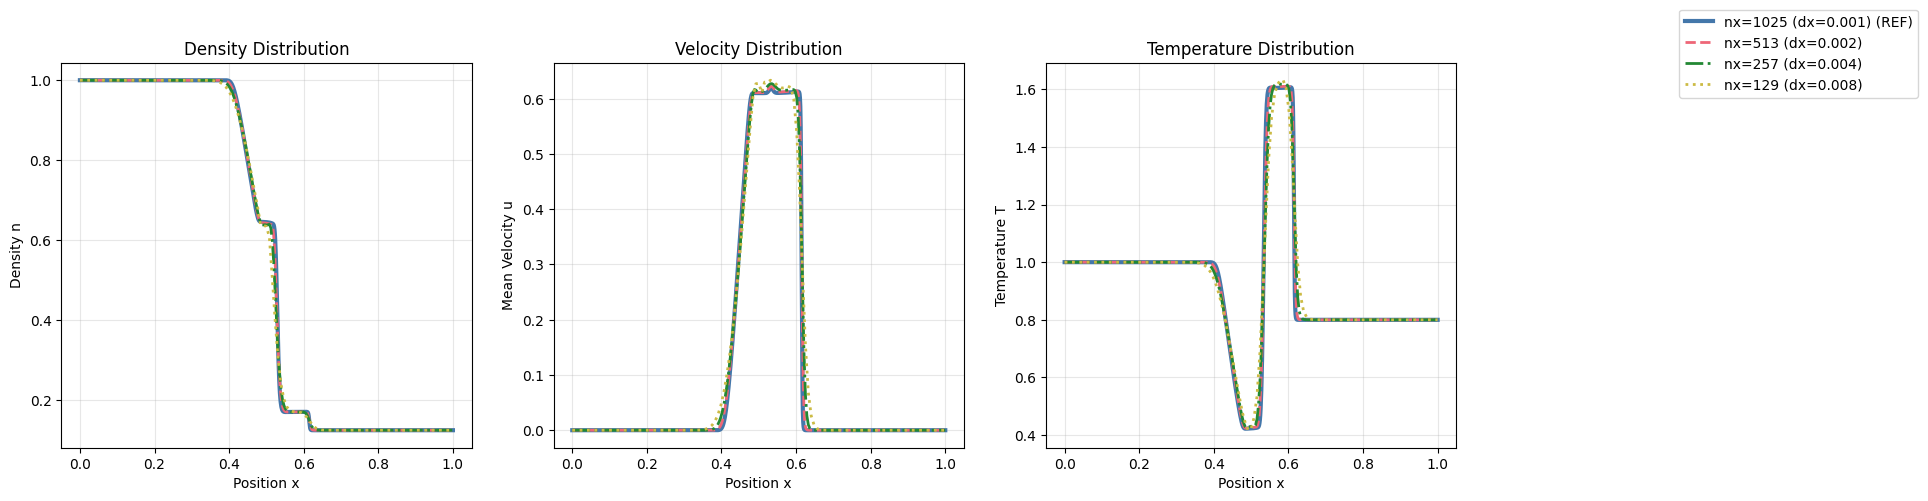

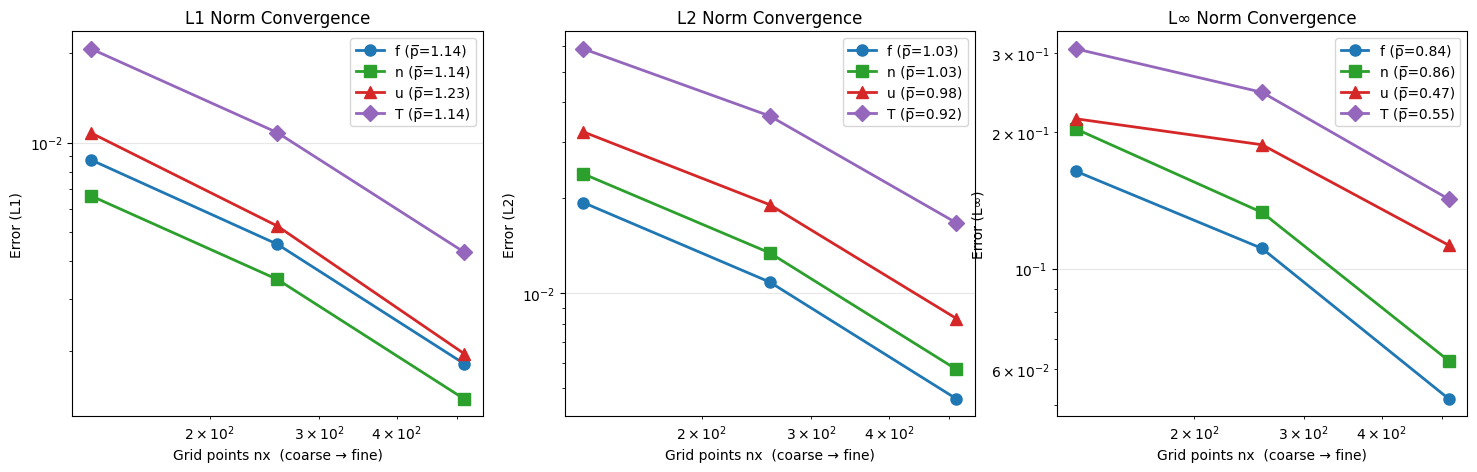

モーメント比較図を保存: moments.png
誤差収束図を保存: errors.png
図を画面に表示しました


{'convergence_orders': {'L1': {'f': np.float64(1.1393608414931773),
   'n': np.float64(1.135033257588336),
   'u': np.float64(1.234026070638969),
   'T': np.float64(1.1365259490174948)},
  'L2': {'f': np.float64(1.0330387112971582),
   'n': np.float64(1.0290619198704112),
   'u': np.float64(0.9825160177369826),
   'T': np.float64(0.9162235766279362)},
  'Linf': {'f': np.float64(0.8396086502059885),
   'n': np.float64(0.8551435715908553),
   'u': np.float64(0.46661743522418253),
   'T': np.float64(0.5543308137467394)}},
 'figures_saved': ['moments.png', 'errors.png'],
 'benchmark_type': 'spatial',
 'ref_grid': 1025}

In [5]:
# 結果表示
tmp = sim_holo.load_benchmark_results("holo_benchmark")
err = sim_holo.compute_error(tmp)
sim_holo.plot_benchmark_results(bench_results=tmp, error_dict=err, show_plots=True)

ベンチマーク結果を読み込み: implicit_benchmark  (meta: {'saved_at': '2025-11-22T19:20:34', 'hostname': 'arlm-ASUS-TUF-Gaming-A15-FA506QR', 'torch_version': '2.7.1+cu126', 'device': 'cuda', 'dtype': 'torch.float64', 'solver': 'implicit'})


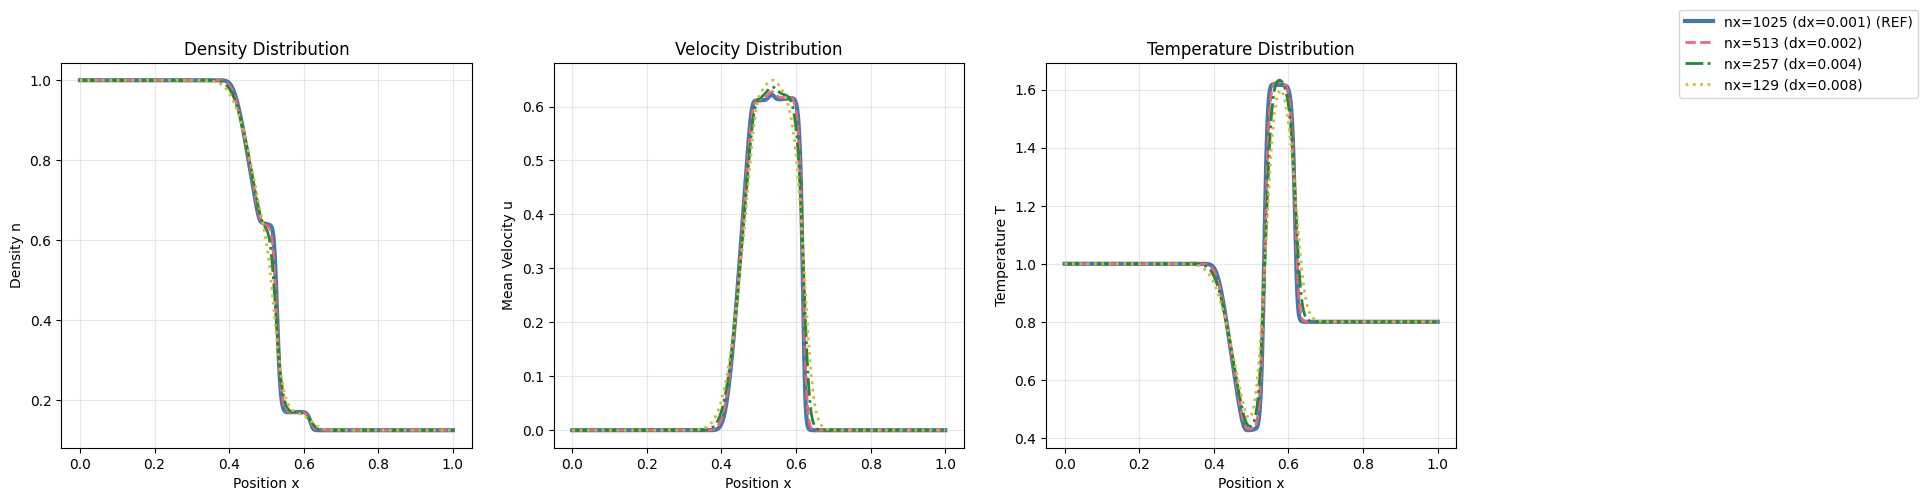

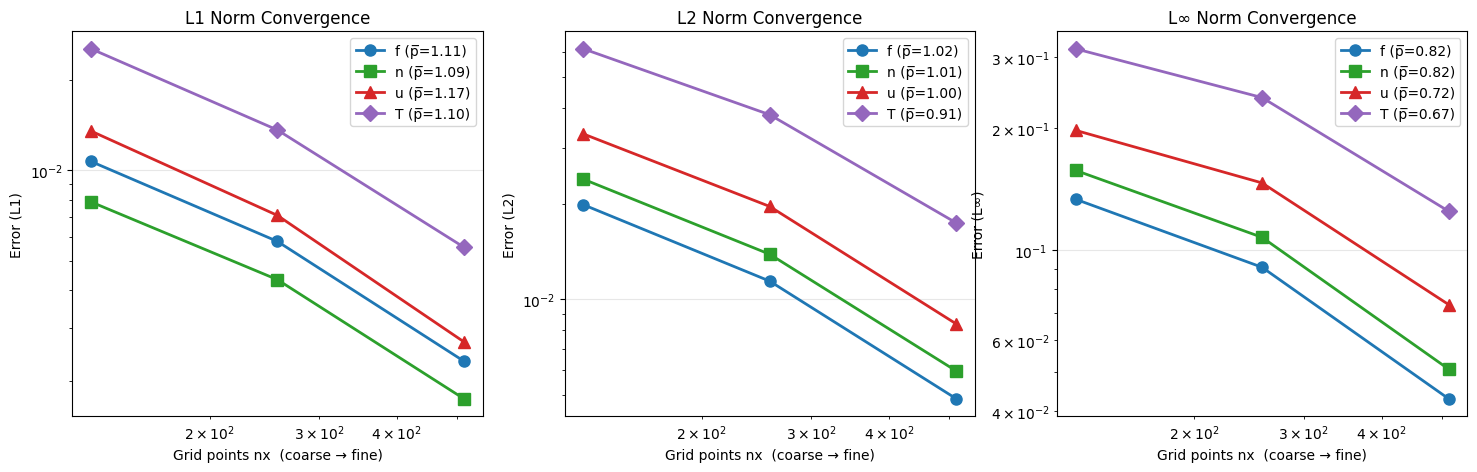

モーメント比較図を保存: moments.png
誤差収束図を保存: errors.png
図を画面に表示しました


{'convergence_orders': {'L1': {'f': np.float64(1.1084651112032275),
   'n': np.float64(1.0923354768476536),
   'u': np.float64(1.1699576371431861),
   'T': np.float64(1.1010630109535038)},
  'L2': {'f': np.float64(1.0188061722890414),
   'n': np.float64(1.007120238465045),
   'u': np.float64(0.9975791899363579),
   'T': np.float64(0.9141388740203009)},
  'Linf': {'f': np.float64(0.8218857390333097),
   'n': np.float64(0.8186964502807345),
   'u': np.float64(0.717874298709775),
   'T': np.float64(0.6691447943116163)}},
 'figures_saved': ['moments.png', 'errors.png'],
 'benchmark_type': 'spatial',
 'ref_grid': 1025}

In [6]:
tmp = sim_implicit.load_benchmark_results(filename="implicit_benchmark")
err = sim_implicit.compute_error(tmp)
sim_implicit.plot_benchmark_results(bench_results=tmp, error_dict=err, show_plots=True)

ベンチマーク結果を読み込み: explicit_benchmark  (meta: {'saved_at': '2025-11-22T18:03:27', 'hostname': 'arlm-ASUS-TUF-Gaming-A15-FA506QR', 'torch_version': '2.7.1+cu126', 'device': 'cuda', 'dtype': 'torch.float64', 'solver': 'explicit'})


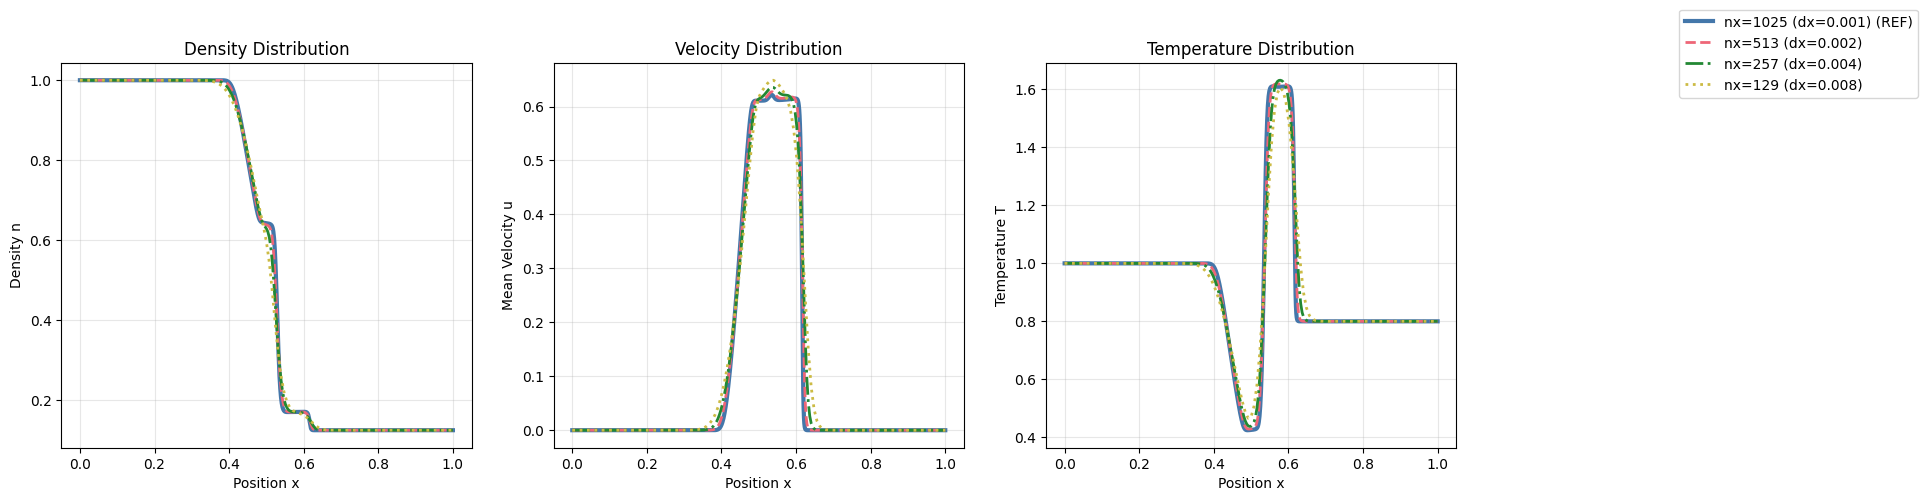

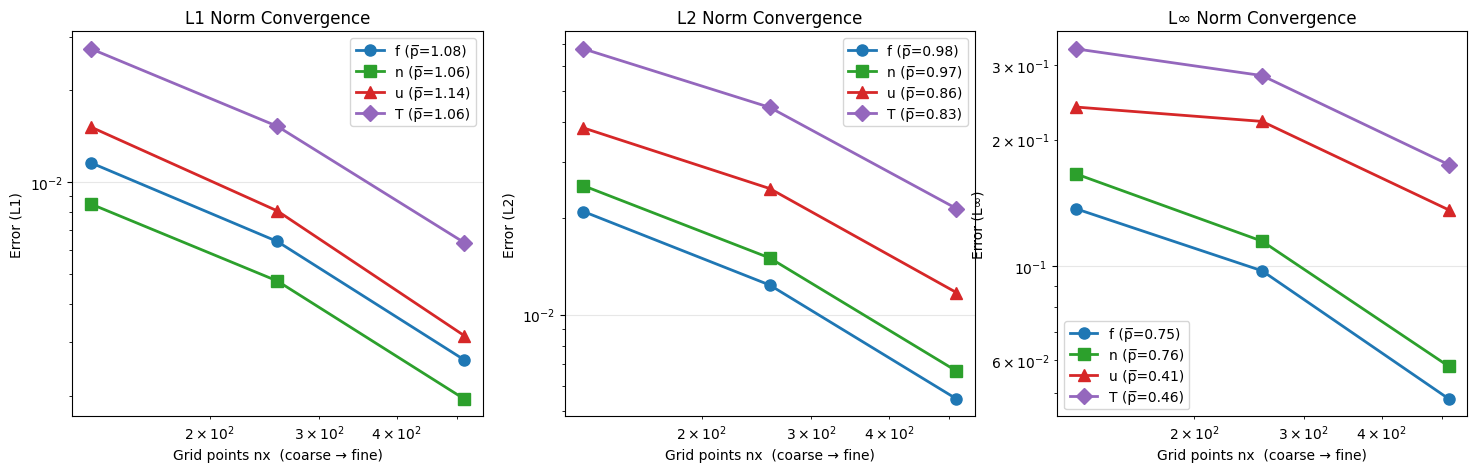

モーメント比較図を保存: moments.png
誤差収束図を保存: errors.png
図を画面に表示しました


{'convergence_orders': {'L1': {'f': np.float64(1.0756749662067353),
   'n': np.float64(1.0639824206508623),
   'u': np.float64(1.138662439413159),
   'T': np.float64(1.0580150562913357)},
  'L2': {'f': np.float64(0.9767352043448371),
   'n': np.float64(0.9659614021595188),
   'u': np.float64(0.8584299423074843),
   'T': np.float64(0.8326108337512009)},
  'Linf': {'f': np.float64(0.7525969921037369),
   'n': np.float64(0.7619067933984726),
   'u': np.float64(0.4072047036690665),
   'T': np.float64(0.4584330582191908)}},
 'figures_saved': ['moments.png', 'errors.png'],
 'benchmark_type': 'spatial',
 'ref_grid': 1025}

In [7]:
tmp = sim_explicit.load_benchmark_results(filename="explicit_benchmark")
err = sim_explicit.compute_error(tmp)
sim_explicit.plot_benchmark_results(bench_results=tmp, error_dict=err, show_plots=True)